In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, beta
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from mlscorecheck.auc import (
    auc_onmin_grad,
    auc_rmin_grad,
    auc_max_grad,
    auc_maxa_grad,
    macc_min_grad,
    acc_rmax_grad,
    auc_from,
    auc_from_aggregated
)
from sklearn.linear_model import LinearRegression

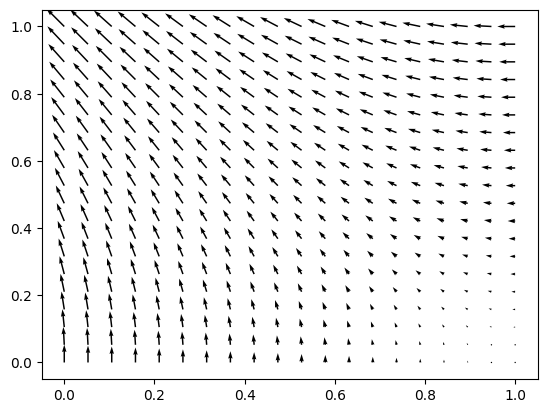

In [94]:
fpr = np.linspace(0.0, 1.0, 20)
tpr = np.linspace(0.0, 1.0, 20)
fpr = np.repeat(fpr, 20, 0)
tpr = np.hstack([tpr]*20)
dx = - tpr
dy = 1 - fpr
plt.quiver(fpr, tpr, dx, dy)

In [95]:
np.atan2(1, 100)

np.float64(0.009999666686665238)

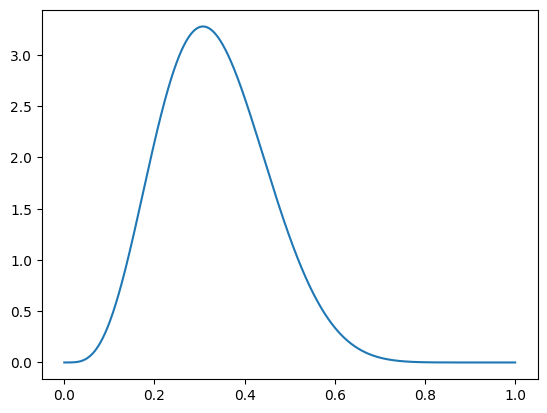

In [96]:
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, 5, 10)
plt.plot(x, (y))

In [97]:
beta.pdf(0.2, 10, 20)

np.float64(1.477953873055371)

In [98]:
def expected_value(a, b, start, end, n):
    aucs = np.linspace(start, end, n)
    dx = (end - start)/n
    norm = beta.cdf(end, a, b) - beta.cdf(start, a, b)
    pdfs = beta.pdf(aucs, a, b)
    pdfs = pdfs / norm
    return np.sum(aucs * pdfs)*dx

In [99]:
expected_value(1146, 1150 - 1146, 0.9091, 0.9965, 100000)

np.float64(0.9951574936863115)

In [100]:
expected_value(2, 10, 0.0, 0.4, 1000)

np.float64(0.15740085031641243)

In [101]:
#label = 'aggregated-ns'
#clabel = 'avg.'

label = 'aggregated3'
clabel = 'avg.'

label = 'single3'
clabel = ''

In [102]:
results = []

In [103]:
data = pd.read_csv(f'processed-{label}.csv')

In [287]:
data2 = pd.read_csv(f'processed-{label}.csv')

In [288]:
data2 = data2[(data2['sens'] > 0.0) & (data2['sens'] < 1.0) & (data2['spec'] > 0.0) & (data2['spec'] < 1.0)]
data2 = data2[(data2['best_sens'] > 0.0) & (data2['best_sens'] < 1.0) & (data2['best_spec'] > 0.0) & (data2['best_spec'] < 1.0)]

(array([  21.,   66.,  233.,  264.,  522.,  706.,  607., 1055.,  977.,
         812.]),
 array([0.52931034, 0.57623886, 0.62316738, 0.67009589, 0.71702441,
        0.76395293, 0.81088144, 0.85780996, 0.90473847, 0.95166699,
        0.99859551]),
 <BarContainer object of 10 artists>)

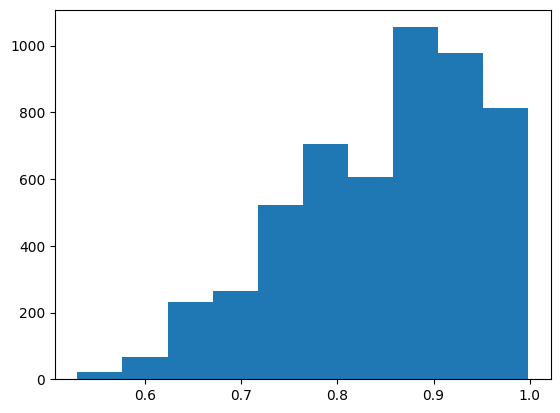

In [289]:
plt.hist(data2['auc'])

In [104]:
data = data[(data['sens'] > 0.0) & (data['sens'] < 1.0) & (data['spec'] > 0.0) & (data['spec'] < 1.0)]
data = data[(data['best_sens'] > 0.0) & (data['best_sens'] < 1.0) & (data['best_spec'] > 0.0) & (data['best_spec'] < 1.0)]
#data = data[(data['n']/data['p'] > 3) | (data['p']/data['n'] > 3)]
#data = data[(data['sens'] >= (1 - data['spec']))]
#data = data[data['p']*data['n'] < 1000]
#data = data[data['sens'] < 0.5]
#data = data[data['n'] > data['p']]
#data = data[data['dataset'].isin(['australian', 'yeast1', 'pima', 'crx'])]
#data = data[data['n_nodes'] < 5]

print(len(data))

data = data[data['n_nodes'] > 3]

data = pd.concat([
    data[(data['auc'] >= 0.5) & (data['auc'] <= 0.55)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.55) & (data['auc'] <= 0.6)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.6) & (data['auc'] <= 0.65)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.65) & (data['auc'] <= 0.7)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.7) & (data['auc'] <= 0.75)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.75) & (data['auc'] <= 0.8)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.8) & (data['auc'] <= 0.85)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.85) & (data['auc'] <= 0.9)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.9) & (data['auc'] <= 0.95)].sample(100, random_state=5, replace=True),
    data[(data['auc'] > 0.95) & (data['auc'] <= 1.0)].sample(100, random_state=5, replace=True),
    ])

#data = data[data['auc'] > 0.75]

#data = data[data['n'] / data['p'] > 2]
#data = data[np.sqrt(data['sens'] * data['spec']) > 0.5]

5263


In [105]:
def auc_analytic(row):
    frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])

    exp_tpr = np.log(row['sens'])/np.log(frac)
    exp_fpr = np.log(1 - row['spec'])/np.log(frac)

    x = np.linspace(0, 1, 100)
    tpr = x**exp_tpr
    fpr = x**exp_fpr

    #print(exp_tpr, exp_fpr)

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [106]:
np.logspace(-3, 0, 50)

array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])

In [325]:
def auc_analytic_mod(row):
    frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])
    acc = row['best_acc']
    sens_orig = row['sens']
    spec_orig = row['spec']

    search_tpr = np.logspace(-3, 0, 100)
    search_fpr = np.logspace(0, 2, 100)

    p = row['p']
    n = row['n']

    x = np.linspace(0.00001, 1, 100)

    dist = np.inf

    for exp0 in search_tpr:
        for exp1 in search_fpr:
            sens = frac ** exp0
            fpr = frac ** exp1 

            tprs = x**exp0
            fprs = x**exp1

            auc = float(np.sum((fprs[1:] - fprs[:-1])*(tprs[:-1] + tprs[1:])/2))

            if auc < 0.5:
                continue

            dist_tmp = max((np.abs(sens - sens_orig)/sens_orig)**2, (np.abs((1 - fpr) - spec_orig)/spec_orig)**2)
            if dist_tmp < dist:
                dist = dist_tmp
                exp_tpr = exp0
                exp_fpr = exp1

    if dist == np.inf:
        exp_tpr = 1
        exp_fpr = 1
    
    #print(exp_tpr, exp_fpr)
    #print(exp_tpr, exp_fpr)

    tpr = x**exp_tpr
    fpr = x**exp_fpr

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [326]:
def auc_analytic_best(row):
    frac = (row['best_sens']*row['p'] + (1 - row['best_spec'])*row['n']) / (row['p'] + row['n'])
    acc = row['best_acc']

    exp_tpr = np.log(row['best_sens'])/np.log(frac)
    exp_fpr = np.log(1 - row['best_spec'])/np.log(frac)

    x = np.linspace(0, 1, 100)
    tpr = x**exp_tpr
    fpr = x**exp_fpr

    accs = (row['p'] * tpr + (1 - fpr) * row['n']) / (row['p'] + row['n'])
    cap_mask = accs > acc

    tpr[cap_mask] = (acc * (row['p'] + row['n']) - (1 - fpr[cap_mask]) * row['n'])/row['p']

    #print(exp_tpr, exp_fpr)
    
    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [330]:
def auc_analytic_best_mod(row):
    frac = (row['best_sens']*row['p'] + (1 - row['best_spec'])*row['n']) / (row['p'] + row['n'])
    acc = row['best_acc']

    search_tpr = np.logspace(-3, 1, 100)
    search_fpr = np.logspace(-1, 2, 100)

    best_sens = row['best_sens']
    best_spec = row['best_spec']
    p = row['p']
    n = row['n']

    x = np.linspace(0.00001, 1, 100)

    dist = np.inf

    for exp0 in search_tpr:
        for exp1 in search_fpr:
            sens = frac ** exp0
            fpr = frac ** exp1 

            max_acc = (x**exp0 * p + (1 - x**exp1) * n) / (p + n)
            #print(exp0, exp1, np.max(max_acc), acc)

            tprs = x**exp0
            fprs = x**exp1

            auc = float(np.sum((fprs[1:] - fprs[:-1])*(tprs[:-1] + tprs[1:])/2))

            dist_tmp = ((np.abs(sens - best_sens)/best_sens) + (np.abs((1 - fpr) - best_spec)/best_spec) + (np.abs(exp0 - 1/exp1)/(exp0 + 1/exp1)/2)*(max(p, n)/min(p, n))**2)

            #print(exp0, exp1, dist_tmp, dist, auc, np.max(max_acc), acc)

            if auc < 0.5:
                continue

            if np.max(max_acc) > acc:
                continue

            if dist_tmp < dist:
                dist = dist_tmp
                exp_tpr = exp0
                exp_fpr = exp1

    if dist == np.inf:
        exp_tpr = 1
        exp_fpr = 1
    
    print(exp_tpr, exp_fpr)

    tpr = x**exp_tpr
    fpr = x**exp_fpr

    return float(np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2))

In [328]:
data['auc_analytic'] = data.apply(auc_analytic_mod, axis=1)
data['auc_analytic_best'] = data.apply(auc_analytic_best, axis=1)

KeyboardInterrupt: 

In [332]:
data['auc_analytic_best_mod'] = data.apply(auc_analytic_best_mod, axis=1)

0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.8111308307896873
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033525783 0.7564633275546289
0.7390722033

In [111]:
idx = 300
auc_analytic(data.iloc[idx]), auc_analytic_mod(data.iloc[idx]), data.iloc[idx]['auc']

(0.6289333781300463, 0.630595424183228, np.float64(0.6700819672131149))

In [112]:
idx = 500
auc_analytic_best(data.iloc[idx]), auc_analytic_best_mod(data.iloc[idx]), data.iloc[idx]['auc']

(0.8723546354676024, 0.8598397741485314, np.float64(0.7826035781544256))

In [113]:
data[['auc', 'auc_analytic', 'auc_analytic_best', 'auc_analytic_best_mod']].describe()

,auc,auc_analytic,auc_analytic_best,auc_analytic_best_mod
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.751466,0.772875,0.803776,0.781779
std,0.139136,0.145011,0.129981,0.141209
min,0.529310,0.511624,0.579867,0.511622
25%,0.639946,0.641366,0.663797,0.625169
50%,0.748854,0.786227,0.812089,0.790104
75%,0.869056,0.903141,0.923708,0.910954
max,0.997191,0.994812,0.996189,0.994928


In [114]:
r2_score(data['auc'], data['auc_analytic'])

0.8397428530475235

In [266]:
r2_score(data['auc'], data['auc_analytic_best'])

0.6129499688375019

In [303]:
#tmp = data[(data['p']/data['n'] < 5) & (data['n']/data['p'] < 5)]
tmp = data[data['auc'] >= 0.7]
r2_score(tmp['auc'], tmp['auc_analytic_best_mod']), len(data), len(tmp)

(0.3416642355972124, 1000, 600)

In [333]:
r2_score(data['auc'], data['auc_analytic_best_mod'])

0.32218641713093543

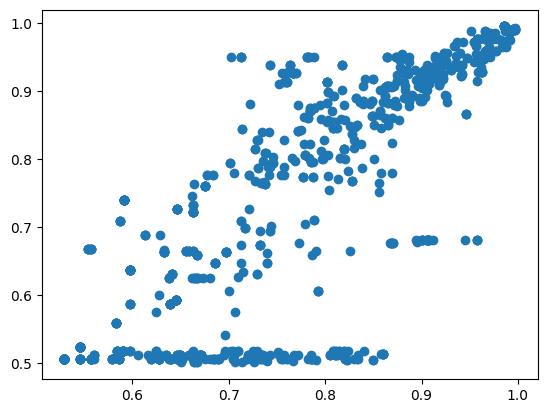

In [334]:
plt.scatter(data['auc'], data['auc_analytic_best_mod'])

In [336]:
tmp = data[data['auc_analytic_best_mod'] - data['auc'] < -0.3]
tmp[['classifier', 'classifier_params']]

,classifier,classifier_params
5316,SVC,"{'probability': True, 'C': 0.10769179676107676}"
1925,RandomForestClassifier,"{'max_depth': 2, 'random_state': 5}"
422,SVC,"{'probability': True, 'C': 0.1834805252897047}"
1326,RandomForestClassifier,"{'max_depth': 3, 'random_state': 5}"
1411,KNeighborsClassifier,{'n_neighbors': 2}
3873,KNeighborsClassifier,{'n_neighbors': 3}
1348,RandomForestClassifier,"{'max_depth': 6, 'random_state': 5}"
980,RandomForestClassifier,"{'max_depth': 3, 'random_state': 5}"
5188,RandomForestClassifier,"{'max_depth': 4, 'random_state': 5}"
5448,SVC,"{'probability': True, 'C': 0.23897257364938707}"


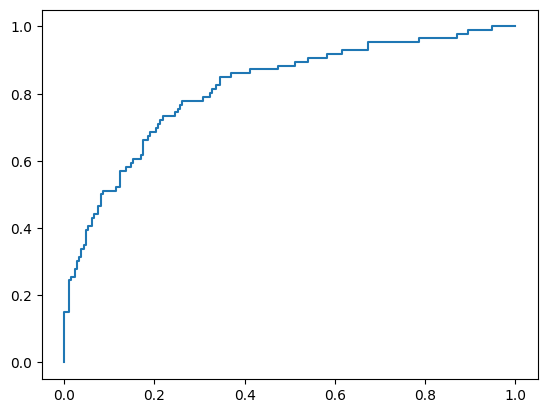

In [337]:
fprs = eval(tmp.iloc[0]['fprs'])
tprs = eval(tmp.iloc[0]['tprs'])
plt.plot(fprs, tprs)

In [338]:
data[data['auc_analytic_best_mod'] - data['auc'] < - 0.2].head()

,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,...,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax,auc_rmin_rmax,auc_onmin_max,auc_onmin_maxa_best
8951,saheart,0.677419,0.687500,0.672131,0.738217,0.720430,0.312500,0.934426,0.346883,0.683786,...,0.695854,0.623438,0.742765,0.559426,0.678752,0.783072,0.774826,0.731172,0.788710,0.725216
5073,yeast1,0.764310,0.546512,0.853081,0.727323,0.771044,0.372093,0.933649,0.288964,0.666667,...,0.726309,0.652841,0.752604,0.609987,0.709750,0.815755,0.808081,0.755957,0.816615,0.762786
2540,saheart,0.677419,0.781250,0.622951,0.735656,0.709677,0.531250,0.803279,0.346883,0.483888,...,0.697584,0.667231,0.731938,0.620003,0.684709,0.782496,0.774050,0.749675,0.809840,0.740331
2541,saheart,0.623656,0.750000,0.557377,0.719262,0.720430,0.500000,0.836066,0.346883,0.764706,...,0.687135,0.667999,0.737318,0.622434,0.691753,0.779675,0.769869,0.713805,0.771551,0.747500
4362,SPECTF,0.777778,0.454545,0.860465,0.726216,0.814815,0.363636,0.930233,0.206573,0.850000,...,0.722042,0.646905,0.749456,0.616271,0.718822,0.870273,0.864820,0.723577,0.790732,0.770670


In [339]:
row = data[data['auc_analytic_best_mod'] - data['auc'] < - 0.2].iloc[10]
#row = data.iloc[10]

In [340]:
row[['best_acc', 'best_sens', 'best_spec', 'auc', 'auc_analytic', 'auc_analytic_best', 'auc_analytic_best_mod', 'classifier', 'classifier_params', 'p', 'n', 'n_nodes']]

best_acc                                            0.709677
best_sens                                             0.4375
best_spec                                           0.852459
auc                                                 0.735656
auc_analytic                                        0.793871
auc_analytic_best                                   0.696046
auc_analytic_best_mod                               0.505784
classifier                            RandomForestClassifier
classifier_params        {'max_depth': 5, 'random_state': 5}
p                                                         32
n                                                         61
n_nodes                                                   43
Name: 3546, dtype: object

In [322]:
auc_analytic(row)

0.838014379597704

In [341]:
auc_analytic_best_mod(row)

0.5590810182512228 0.5722367659350217


0.5057839817112151

In [127]:
#data = data[data['n_nodes'] > 10]

In [128]:
row = data.iloc[400]

In [129]:
row['auc']

np.float64(0.7052777777777778)

In [130]:
frac = (row['sens']*row['p'] + (1 - row['spec'])*row['n']) / (row['p'] + row['n'])

exp_tpr = np.log(row['sens'])/np.log(frac)
exp_fpr = np.log(1 - row['spec'])/np.log(frac)

x = np.linspace(0, 1, 100)
tpr = x**exp_tpr
fpr = x**exp_fpr

np.sum((fpr[1:] - fpr[:-1])*(tpr[:-1] + tpr[1:])/2)

np.float64(0.7026784647845745)

In [131]:
def r2_fun(row):

    tprs = np.array(eval(row['tprs']))
    fprs = np.array(eval(row['fprs']))
    ths = np.array(eval(row['thresholds'], {'inf': np.inf}))
    counts = (tprs * row['p'] + fprs * row['n']) / (row['p'] + row['n'])

    mask = tprs[1:] > 0

    ln_tprs = np.log(tprs[1:][mask])
    ln_counts = np.log(counts[1:][mask]).reshape(-1, 1)

    pred_tprs = LinearRegression(fit_intercept=False).fit(ln_counts, ln_tprs).predict(ln_counts)

    return r2_score(ln_tprs, pred_tprs)

In [132]:
data['r2_tpr'] = data.apply(r2_fun, axis=1)

In [133]:
r2 = data['r2_tpr'].values
print(len(r2[r2 < -1]))
r2 = r2[r2 > -1]

0


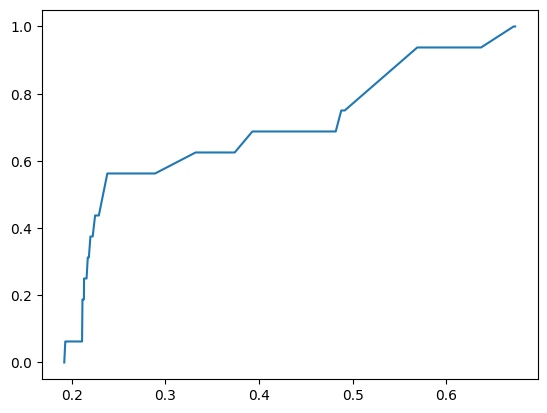

In [134]:
idx = 304
plt.plot(eval(data.iloc[idx]['thresholds'], {'inf': np.inf}), 1.0 - np.array(eval(data.iloc[idx]['tprs'])))

In [135]:
row = data.iloc[304]
tprs = np.array(eval(row['tprs']))
fprs = np.array(eval(row['fprs']))
ths = np.array(eval(row['thresholds'], {'inf': np.inf}))
counts = (tprs * row['p'] + fprs * row['n']) / (row['p'] + row['n'])

mask = tprs[1:] > 0

ln_tprs = np.log(tprs[1:][mask])
ln_counts = np.log(counts[1:][mask]).reshape(-1, 1)

pred_tprs = LinearRegression(fit_intercept=False).fit(ln_counts, ln_tprs).predict(ln_counts)

r2_score(ln_tprs, pred_tprs), row['auc']

(0.9018394570827077, np.float64(0.6589673913043479))

In [136]:
tprs, fprs, ths, counts

(array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.25  , 0.25  , 0.3125,
        0.3125, 0.375 , 0.375 , 0.4375, 0.4375, 0.5625, 0.5625, 0.625 ,
        0.625 , 0.6875, 0.6875, 0.75  , 0.75  , 0.8125, 0.8125, 0.9375,
        0.9375, 0.9375, 0.9375, 1.    ]),
 array([0.        , 0.02173913, 0.04347826, 0.04347826, 0.08695652,
        0.08695652, 0.10869565, 0.10869565, 0.17391304, 0.17391304,
        0.2173913 , 0.2173913 , 0.34782609, 0.34782609, 0.36956522,
        0.36956522, 0.41304348, 0.41304348, 0.47826087, 0.47826087,
        0.52173913, 0.52173913, 0.58695652, 0.58695652, 0.91304348,
        0.95652174, 1.        , 1.        ]),
 array([       inf, 0.67343348, 0.67178404, 0.63701837, 0.56892521,
        0.49148953, 0.48780163, 0.48189521, 0.3929078 , 0.37407803,
        0.33230279, 0.28911099, 0.23811385, 0.22902276, 0.2250438 ,
        0.22247694, 0.22006412, 0.21838054, 0.21721934, 0.21594653,
        0.21325973, 0.2130882 , 0.21155681, 0.21112516, 0.1956945 ,
        0.194703

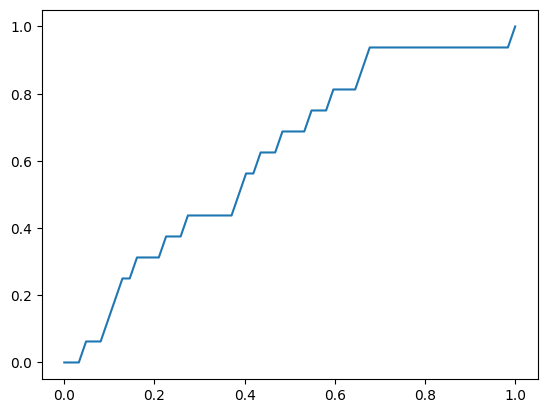

In [137]:
plt.plot(counts, tprs)

In [138]:
row = data.iloc[10]

tprs = 1.0 - np.array(eval(row['tprs'])[1:])
tprs_orig = tprs.copy()
#tprs = 1.0 - np.array(eval(row['fprs'])[1:-1])
ths = np.array(eval(row['thresholds'], {'inf': np.inf})[1:])
ths_orig = np.array(eval(row['thresholds'], {'inf': np.inf})[1:])
mask = tprs >= 0

ths = np.hstack([ths, np.array([0.0])]).reshape(-1, 1)
ths_orig = np.hstack([ths_orig, np.array([0.0])])

tprs = np.hstack([tprs, np.array([0.0])])
tprs_orig = np.hstack([tprs_orig, np.array([1.0])])

tprs = tprs + 0.001
ths = ths + 0.001
ths_orig = ths_orig
tprs_orig = tprs_orig

tprs = np.log(tprs)
ths = np.log(ths)

tmp = (np.hstack([np.array([1]), ths_orig]))
sample_weight = tmp[:-1] - tmp[1:]
preds = LinearRegression(fit_intercept=False, positive=True).fit(ths, tprs, sample_weight=None).predict(ths)
r2_score(tprs, preds)


0.5666014063441887

In [139]:
ths_orig

array([0.92592593, 0.54545455, 0.52727273, 0.35849057, 0.15714286,
       0.        ])

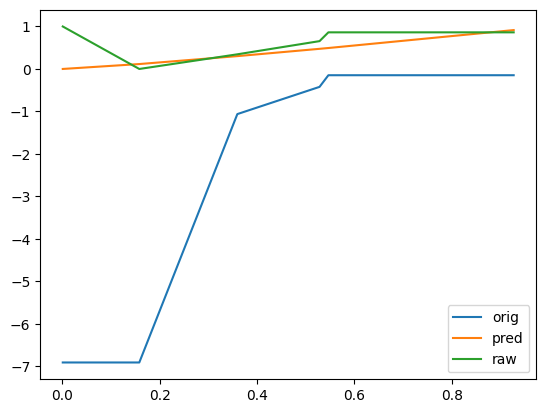

In [140]:
plt.plot(np.exp(ths), tprs, label='orig')
plt.plot(np.exp(ths), np.exp(preds), label='pred')
plt.plot(np.exp(ths), tprs_orig, label='raw')
plt.legend()

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,   1.,   0.,   4.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   0.,
          3.,   0.,   0.,   0.,   2.,   5.,   1.,   0.,   1.,   0.,   1.,
          4.,   4.,   1.,   1.,   0.,   0.,   6.,   4.,   1.,   1.,   3.,
          5.,   2.,   1.,   9.,   3.,   2.,  15.,   9.,  15.,   4.,  10.,
         14.,   5.,   5.,   5.,   7.,   6.,  11.,  10.,  22.,  22.,  20.,
         30.,  25.,   9.,  31.,  25.,  33.,  33.,  64.,  90., 113., 178.,
        109.]),
 array([0.25255143, 0.26002531, 0.26749918, 0.27497306, 0.28244694,
        0.28992081, 0.29739469, 0.30486857, 0.31234245, 0.31981632,
        0.3272902 , 0.33476408, 0.34223795, 0.34971183, 0.35718571,
        0.36465958, 0.37213346, 0.37960734, 0.38708121, 0.39455509,
        0.40202897, 0.40950284, 0.41697672, 0.

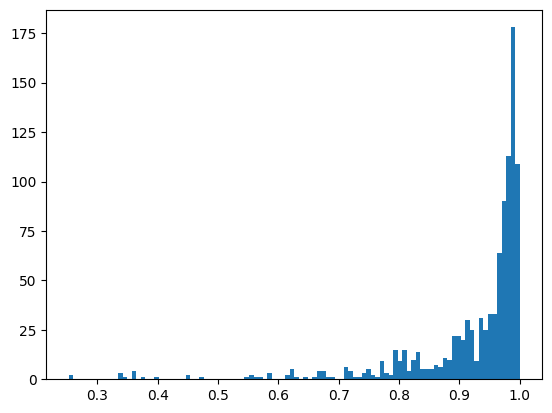

In [141]:
plt.hist(r2, bins=100)

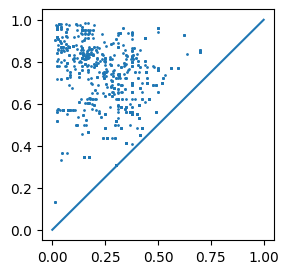

In [142]:
plt.figure(figsize=(3, 3))
plt.scatter(1 - data['spec'], data['sens'], s=1)
plt.plot([0, 1], [0, 1])

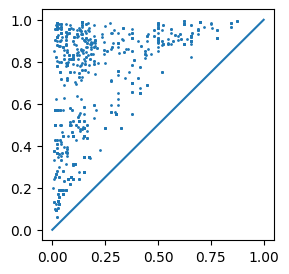

In [143]:
plt.figure(figsize=(3, 3))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1)
plt.plot([0, 1], [0, 1])

In [144]:
data.columns

Index(['dataset', 'acc', 'sens', 'spec', 'auc', 'best_acc', 'best_sens',
       'best_spec', 'threshold', 'best_threshold', 'p', 'n', 'n_nodes', 'fprs',
       'tprs', 'thresholds', 'classifier', 'classifier_params', 'auc_min',
       'auc_min_best', 'auc_rmin', 'auc_rmin_best', 'auc_grmin',
       'auc_grmin_best', 'auc_amin', 'auc_amin_best', 'auc_armin',
       'auc_armin_best', 'auc_onmin', 'auc_onmin_best', 'auc_max',
       'auc_max_best', 'auc_amax', 'auc_amax_best', 'auc_maxa',
       'auc_maxa_best', 'acc_min', 'acc_rmin', 'acc_max', 'acc_rmax',
       'acc_onmax', 'max_acc_min', 'max_acc_max', 'max_acc_rmax',
       'max_acc_onmax', 'auc_analytic', 'auc_analytic_best',
       'auc_analytic_best_mod', 'r2_tpr'],
      dtype='object')

In [145]:
def convert(x):
    try:
        return float(x)
    except:
        return None

In [146]:
data['auc_min_max'] = (data['auc_min'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_max'] = (data['auc_rmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
#data['auc_onmin_max'] = (data['auc_onmin'].apply(convert) + data['auc_max'].apply(convert)) / 2.0
data['auc_rmin_maxa'] = (data['auc_rmin'].apply(convert) + data['auc_maxa'].apply(convert)) / 2.0

data['auc_min_max_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0
data['auc_rmin_max_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_max_best'].apply(convert)) / 2.0

data['auc_min_maxa_best'] = ((data['auc_min_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
data['auc_rmin_maxa_best'] = ((data['auc_rmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0
#data['auc_onmin_maxa_best'] = ((data['auc_onmin_best'].apply(convert)) + data['auc_maxa_best'].apply(convert)) / 2.0

data['max_acc_min_max'] = (data['max_acc_min'].apply(convert) + data['max_acc_max'].apply(convert)) / 2.0
data['max_acc_min_rmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_rmax'].apply(convert)) / 2.0
#data['max_acc_min_onmax'] = (data['max_acc_min'].apply(convert) + data['max_acc_onmax'].apply(convert)) / 2.0



In [147]:
data[['auc_min_best', 'auc_max_best', 'auc_min_max_best', 'best_acc', 'best_sens', 'best_spec', 'p', 'n']]

,auc_min_best,auc_max_best,auc_min_max_best,best_acc,best_sens,best_spec,p,n
5033,0.284366,0.885428,0.584897,0.623188,0.344828,0.825000,29,40
8670,0.163681,0.958708,0.561195,0.623188,0.172414,0.950000,29,40
6931,0.163681,0.958708,0.561195,0.623188,0.172414,0.950000,29,40
8670,0.163681,0.958708,0.561195,0.623188,0.172414,0.950000,29,40
8670,0.163681,0.958708,0.561195,0.623188,0.172414,0.950000,29,40
...,...,...,...,...,...,...,...,...
1123,0.962436,0.999673,0.981055,0.982456,0.986111,0.976190,72,42
5849,0.720983,0.990413,0.855698,0.911765,0.750000,0.961538,16,52
9333,0.916241,0.998604,0.957423,0.963504,0.977528,0.937500,89,48
2174,0.865199,0.995206,0.930202,0.926471,0.923077,0.937500,52,16


In [148]:

data['auc_min_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='min',
    upper='max',
    correction=None
)), axis=1)



In [149]:
data['auc_rmin_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='max',
    correction=None
)), axis=1)

In [150]:
data['auc_rmin_rmax'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='rmax',
    correction=None
)), axis=1)

In [151]:
data['auc_onmin_max'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['acc'],
              'sens': row['sens'],
              'spec': row['spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='onmin',
    upper='max',
    correction=None
)), axis=1)

In [152]:
data['auc_min_max_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='min',
    upper='max',
    correction=None
)), axis=1)

In [153]:
data['auc_rmin_maxa_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='rmin',
    upper='maxa',
    correction=None
)), axis=1)

In [154]:
data['auc_onmin_maxa_best'] = data.apply(lambda row: np.mean(auc_from(
    scores = {'acc': row['best_acc'],
              'sens': row['best_sens'],
              'spec': row['best_spec']},
    eps = 1e-4,
    p=row['p'],
    n=row['n'],
    lower='onmin',
    upper='maxa',
    correction=None
)), axis=1)

In [155]:
data.head()

,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,...,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax,auc_rmin_rmax,auc_onmin_max,auc_onmin_maxa_best
5033,bupa,0.623188,0.344828,0.825,0.546121,0.623188,0.344828,0.825,0.42029,0.527273,...,0.611615,0.584897,0.699941,0.496571,0.611615,0.694496,0.643603,0.641118,0.735171,0.646845
8670,bupa,0.536232,0.310345,0.700,0.529310,0.623188,0.172414,0.950,0.42029,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
6931,bupa,0.536232,0.310345,0.700,0.529310,0.623188,0.172414,0.950,0.42029,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
8670,bupa,0.536232,0.310345,0.700,0.529310,0.623188,0.172414,0.950,0.42029,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
8670,bupa,0.536232,0.310345,0.700,0.529310,0.623188,0.172414,0.950,0.42029,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991


In [156]:
#for col in data.columns[2:]:
#    data[col] = pd.to_numeric(data[col], errors='coerce')

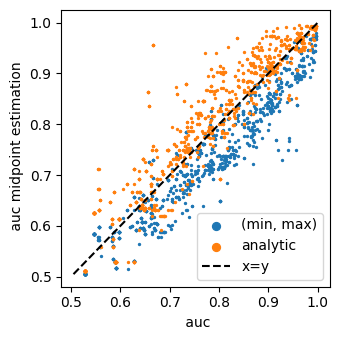

In [157]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_rmax'], label='(rmin, rmax)', s=2)
plt.scatter(data['auc'], data['auc_analytic'], label='analytic', s=2)
#plt.scatter(data['auc'], data['auc_onmin_max'], label='(onmin, max)', s=2)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

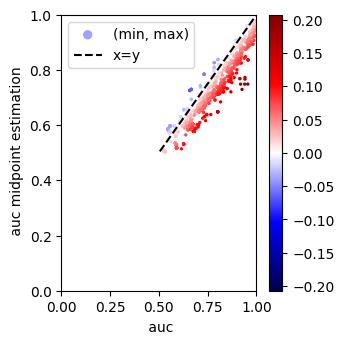

In [158]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max']
val_min = min(min(data['auc']), min(data['auc_min_max']), min(data['auc_rmin_max']))
diff = np.max(np.abs((data['auc'] - data['auc_min_max']).values))
sc = plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig(f'figures-midpoints/{label}-auc-midpoint.pdf')

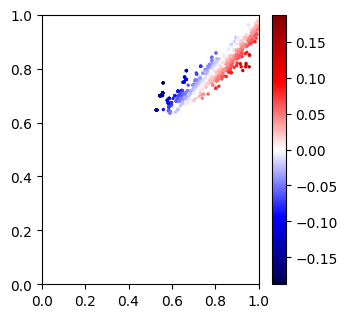

In [159]:
plt.figure(figsize=(3.5, 3.5))
z = data['auc'] - data['auc_rmin_max']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_max']).values))
sc = plt.scatter(data['auc'], data['auc_rmin_max'], label='(rmin, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

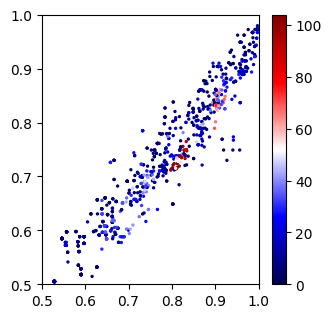

In [160]:
plt.figure(figsize=(3.5, 3.5))
z = data['n_nodes']
diff = np.max(np.abs((data['n_nodes']).values))
sc = plt.scatter(data['auc'], data['auc_min_max'], label='(min, max)', s=2, c=z, cmap=cm, vmin=0, vmax=diff)
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.colorbar()

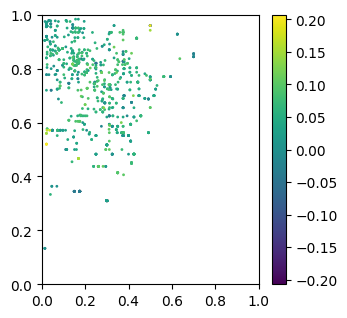

In [161]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('viridis')
z = data['auc'] - data['auc_min_max']
diff = np.max(np.abs((data['auc'] - data['auc_min_max']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

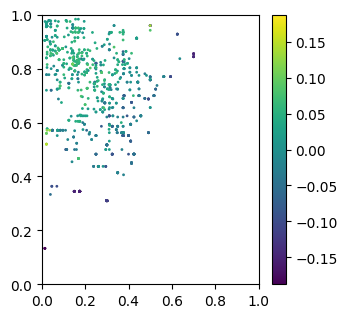

In [162]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('viridis')
z = data['auc'] - data['auc_rmin_max']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_max']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

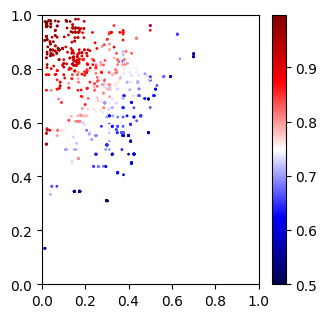

In [163]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc']
diff = np.max(np.abs((data['auc']).values))
plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=0.5, vmax=diff)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()

In [164]:
def rline_intersect(sens, spec):
    a = (1 - sens)/(1 - spec)
    b = sens - a*spec
    se0 = (a + b)/(1 + a)
    sp0 = 1 - se0
    return se0, sp0

def rcirc_intersect(sens, spec):
    a = (1 - sens)/(1 - spec)
    b = sens - a*spec
    se0 = (2*b + np.sqrt(4*b**2 - 4*(1 + a**2)*(b**2 - a**2)))/(2*(1 + a**2))
    sp0 = np.sqrt(1 - se0**2)
    return se0, sp0

In [165]:
se = 0.8
sp = 0.9
se0, sp0 = rline_intersect(se, sp)
se1, sp1 = rcirc_intersect(se, sp)

se0, sp0, se1, sp1

(0.3333333333333333, 0.6666666666666667, np.float64(0.6), np.float64(0.8))

0.5293103448275862


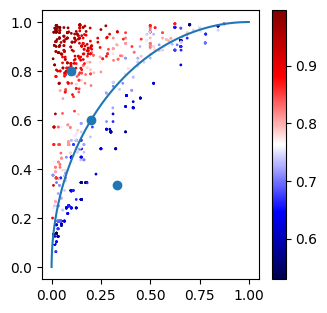

In [166]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc']
diff = np.max(np.abs((data['auc']).values))
vmin = np.min(np.abs((data['auc']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=vmin, vmax=diff)
#plt.scatter(1 - data['spec'], data['sens'], s=1, c=z, cmap=cm, vmin=0.5, vmax=diff, marker='x')
plt.colorbar()
plt.scatter([1 - sp, 1 - sp0, 1 - sp1], [se, se0, se1])
circ = np.linspace(-3.1415/2, 0, 1000)
x = np.sin(circ) + 1
y = np.cos(circ)
plt.plot(x, y)
print(vmin)


In [167]:
tmp = data[['auc', 'auc_rmin_max']].dropna()
tmp3 = data[['auc', 'auc_rmin_rmax']].dropna()
tmp1 = data[['auc', 'auc_onmin_max']].dropna()
tmp2 = data[['auc', 'auc_min_max', 'auc_analytic']].dropna()
(r2_score(tmp2['auc'], tmp2['auc_min_max']),
r2_score(tmp['auc'], tmp['auc_rmin_max']),
r2_score(tmp3['auc'], tmp3['auc_rmin_rmax']),
r2_score(tmp1['auc'], tmp1['auc_onmin_max']),
r2_score(tmp2['auc'], tmp2['auc_analytic']))

(0.83057860989232,
 0.7754129961832225,
 0.882240595119838,
 0.6382457024883663,
 0.8397428530475235)

In [168]:
(mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_min_max']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max']))

(np.float64(0.06352273429050345), np.float64(0.07829270416030586))

In [169]:
len(data), len(tmp)

(1000, 1000)

In [170]:
data

,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,...,auc_rmin_maxa,auc_min_max_best,auc_rmin_max_best,auc_min_maxa_best,auc_rmin_maxa_best,max_acc_min_max,max_acc_min_rmax,auc_rmin_rmax,auc_onmin_max,auc_onmin_maxa_best
5033,bupa,0.623188,0.344828,0.825000,0.546121,0.623188,0.344828,0.825000,0.420290,0.527273,...,0.611615,0.584897,0.699941,0.496571,0.611615,0.694496,0.643603,0.641118,0.735171,0.646845
8670,bupa,0.536232,0.310345,0.700000,0.529310,0.623188,0.172414,0.950000,0.420290,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
6931,bupa,0.536232,0.310345,0.700000,0.529310,0.623188,0.172414,0.950000,0.420290,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
8670,bupa,0.536232,0.310345,0.700000,0.529310,0.623188,0.172414,0.950000,0.420290,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
8670,bupa,0.536232,0.310345,0.700000,0.529310,0.623188,0.172414,0.950000,0.420290,0.772727,...,0.604415,0.561195,0.733113,0.436228,0.608146,0.690963,0.630677,0.510434,0.649187,0.634991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,wdbc,0.964912,0.958333,0.976190,0.985780,0.982456,0.986111,0.976190,0.626374,0.571429,...,0.968100,0.981055,0.981439,0.980891,0.981275,0.956582,0.956564,0.967934,0.983138,0.990248
5849,ecoli1,0.897059,0.875000,0.903846,0.962740,0.911765,0.750000,0.961538,0.227612,0.625021,...,0.890935,0.855698,0.871850,0.849699,0.865850,0.937654,0.937569,0.895730,0.938713,0.917092
9333,wisconsin,0.963504,0.977528,0.937500,0.986657,0.963504,0.977528,0.937500,0.650183,0.750000,...,0.957956,0.957423,0.958713,0.956666,0.957956,0.958567,0.958551,0.958713,0.978059,0.977302
2174,ecoli1,0.926471,0.923077,0.937500,0.969351,0.926471,0.923077,0.937500,0.772388,0.833333,...,0.927743,0.930202,0.932837,0.925108,0.927743,0.943810,0.943753,0.932837,0.962747,0.957653


In [171]:
"""tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"""

"tmp = data.dropna()\nwilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max']), \n         np.abs(tmp['auc'] - tmp['auc_rmin_max']))"

In [172]:
results.append({'target': ['auc', 'auc'],
                'source': ['arbitrary sens, spec', 'arbitrary sens, spec'],
                'estimation': ['(min, max)', '(rmin, max)'],
                'r2': [r2_score(tmp2['auc'], tmp2['auc_min_max']),
                       r2_score(tmp['auc'], tmp['auc_rmin_max'])],
                'mape': [mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_min_max']),
                         mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max'])]})

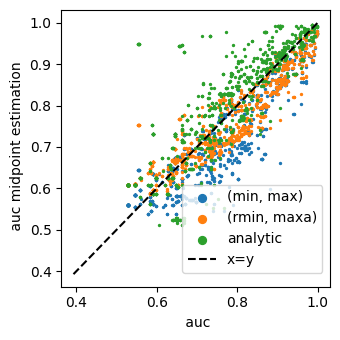

In [173]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['auc']), 
              min(data['auc_min_max_best']),
              min(data['auc_rmin_max_best']),
              min(data['auc_min_maxa_best']),
              min(data['auc_rmin_maxa_best']),
              min(data['auc_onmin_maxa_best'])
              )
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(data['auc'], data['auc_min_max_best'], label='(min, max)', s=2)
#plt.scatter(data['auc'], data['auc_rmin_max_best'], label='(rmin, max)', s=2)
#plt.scatter(data['auc'], data['auc_min_maxa_best'], label='(min, maxa)', s=2)
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=2)
#plt.scatter(data['auc'], data['auc_onmin_maxa_best'], label='(onmin, maxa)', s=2)
#plt.scatter(data['auc'], data['auc_analytic_best'], label='analytic', s=2)
plt.scatter(data['auc'], data['auc_analytic_best_mod'], label='analytic', s=2)
plt.xlabel(f'{clabel} auc')
plt.ylabel(f'{clabel} auc midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4, loc=(0.45, 0.05))
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-auc-macc-midpoint.pdf')

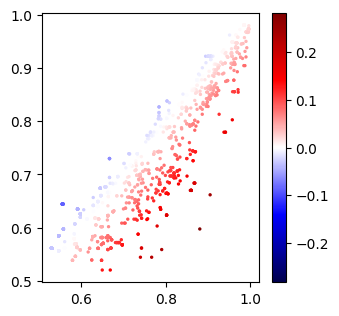

In [174]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(data['auc'], data['auc_min_max_best'], label='(rmin, max)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

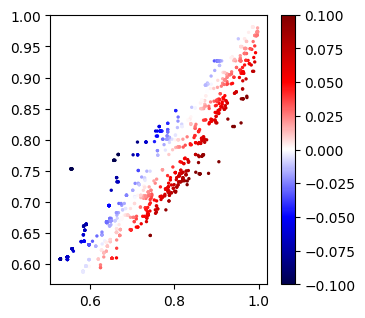

In [175]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_rmin_maxa_best']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_maxa_best']).values))
plt.scatter(data['auc'], data['auc_rmin_maxa_best'], label='(rmin, maxa)', s=2, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

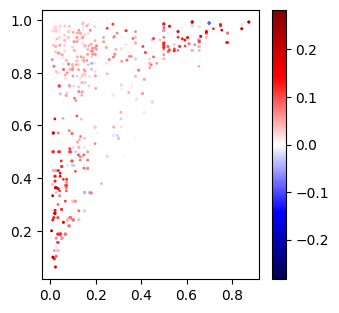

In [176]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_min_max_best']
diff = np.max(np.abs((data['auc'] - data['auc_min_max_best']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

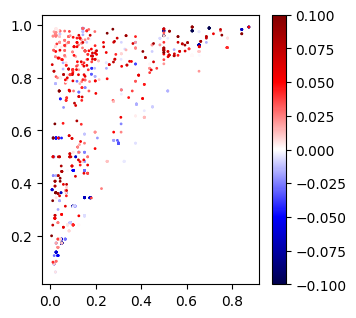

In [177]:
plt.figure(figsize=(3.5, 3.5))
cm = plt.get_cmap('seismic')
z = data['auc'] - data['auc_rmin_maxa_best']
diff = np.max(np.abs((data['auc'] - data['auc_rmin_maxa_best']).values))
plt.scatter(1 - data['best_spec'], data['best_sens'], s=1, c=z, cmap=cm, vmin=-diff, vmax=diff)
plt.colorbar()

In [178]:
tmp = data[['auc', 'auc_min_max_best', 'auc_rmin_max_best', 'auc_min_maxa_best', 'auc_rmin_maxa_best', 'auc_onmin_maxa_best']].dropna()

tmp0 = data[['auc', 'auc_rmin_max_best']].dropna()
#tmp1 = data[['auc', 'auc_min_maxa_best']].dropna()
tmp2 = data[['auc', 'auc_rmin_maxa_best']].dropna()
tmp3 = data[['auc', 'auc_onmin_maxa_best']].dropna()
(r2_score(tmp['auc'], tmp['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp['auc'], tmp['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best']),
r2_score(tmp3['auc'], tmp3['auc_onmin_maxa_best']),
r2_score(data['auc'], data['auc_analytic_best']),
r2_score(data['auc'], data['auc_analytic_best_mod']))

(0.771350390698377,
 0.5918088216317245,
 0.4739766037373889,
 0.8481531042942002,
 0.7703681664785309,
 0.6129499688375019,
 0.6506102117304811)

In [179]:
len(tmp0), len(tmp1), len(tmp2), len(tmp3), len(data)

(1000, 1000, 994, 1000, 1000)

In [180]:
(mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp['auc'], tmp['auc_rmin_maxa_best']))

(np.float64(0.06871215817705313),
 np.float64(0.10569441369447687),
 np.float64(0.11706903685227037),
 np.float64(0.062044045919784))

In [181]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['auc'] - tmp['auc_min_max_best']), 
         np.abs(tmp['auc'] - tmp['auc_rmin_maxa_best']))

WilcoxonResult(statistic=np.float64(203727.5), pvalue=np.float64(1.5223240841381665e-06))

In [182]:
results.append({'target': ['auc', 'auc', 'auc', 'auc'],
                'source': ['sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc', 'sens, spec at max. acc'],
                'estimation': ['(min, max)', '(rmin, max)', '(min, maxa)', '(rmin, maxa)'],
                'r2': (r2_score(data['auc'], data['auc_min_max_best']),
r2_score(tmp0['auc'], tmp0['auc_rmin_max_best']),
r2_score(tmp1['auc'], tmp1['auc_min_maxa_best']),
r2_score(tmp2['auc'], tmp2['auc_rmin_maxa_best'])),
                'mape': (mean_absolute_percentage_error(data['auc'], data['auc_min_max_best']),
mean_absolute_percentage_error(tmp0['auc'], tmp0['auc_rmin_max_best']),
mean_absolute_percentage_error(tmp1['auc'], tmp1['auc_min_maxa_best']),
mean_absolute_percentage_error(tmp2['auc'], tmp2['auc_rmin_maxa_best']))})

KeyError: 'auc_min_maxa_best'

In [88]:
data[['best_acc', 'best_sens', 'best_spec', 'p', 'n', 'max_acc_min_max', 'max_acc_min_rmax'
      #, 'max_acc_min_onmax'
      ]]

,best_acc,best_sens,best_spec,p,n,max_acc_min_max,max_acc_min_rmax
5623,0.945578,1.00,0.000000,139,8,0.959456,0.949425
6532,0.900000,0.00,1.000000,10,90,0.926005,0.910025
8110,0.900000,1.00,0.000000,90,10,0.926394,0.911806
4513,0.900000,0.00,1.000000,10,90,0.926061,0.910298
368,0.806452,1.00,0.000000,25,6,0.859365,0.836048
...,...,...,...,...,...,...,...
3142,1.000000,1.00,1.000000,25,341,0.998216,0.998216
3417,1.000000,1.00,1.000000,68,4,0.998380,0.998380
1449,1.000000,1.00,1.000000,20,10,0.996667,0.996667
2944,0.943662,0.88,0.978261,25,46,0.921006,0.920826


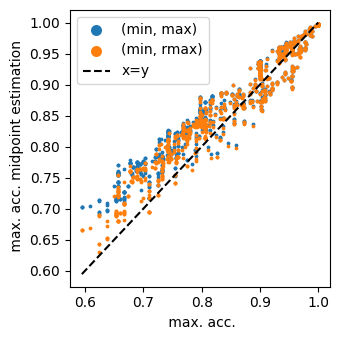

In [89]:
plt.figure(figsize=(3.5, 3.5))
val_min = min(min(data['best_acc']), 
              min(data['max_acc_min_max']),
              min(data['max_acc_min_rmax']))
plt.scatter(data['best_acc'], data['max_acc_min_max'], label='(min, max)', s=3)
plt.scatter(data['best_acc'], data['max_acc_min_rmax'], label='(min, rmax)', s=3)
#plt.scatter(data['best_acc'], data['max_acc_min_onmax'], label='(min, onmax)', s=3)
plt.xlabel(f'{clabel} max. acc.')
plt.ylabel(f'{clabel} max. acc. midpoint estimation')
plt.plot([val_min, 1], [val_min, 1], label='x=y', c='black', linestyle='--')
plt.legend(markerscale=4)
plt.tight_layout()
plt.savefig(f'figures-midpoints/{label}-max-acc-midpoint.pdf')

In [90]:
tmp0 = data[['best_acc', 'max_acc_min_max']].dropna()
tmp1 = data[['best_acc', 'max_acc_min_rmax']].dropna()
(r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(0.8084424256472821, 0.8777564442488769)

In [91]:
(mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))

(np.float64(0.04899950493681104), np.float64(0.03854606442950721))

In [92]:
tmp = data.dropna()
wilcoxon(np.abs(tmp['best_acc'] - tmp['max_acc_min_max']), 
         np.abs(tmp['best_acc'] - tmp['max_acc_min_rmax']))

WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [93]:
results.append({'target': ['max. acc', 'max. acc'],
                'source': ['auc', 'auc'],
                'estimation': ['(min, max)', '(min, rmax)'],
                'r2': (r2_score(tmp0['best_acc'], tmp0['max_acc_min_max']),
r2_score(tmp1['best_acc'], tmp1['max_acc_min_rmax'])),
                'mape': (mean_absolute_percentage_error(tmp0['best_acc'], tmp0['max_acc_min_max']),
mean_absolute_percentage_error(tmp1['best_acc'], tmp1['max_acc_min_rmax']))})

In [94]:
results = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1]), pd.DataFrame(results[2])])

In [95]:
results.to_csv(f'results-midpoints-{label}.csv', index=False)